# This notebook demonstrates the results of the updated 825nm SPC mode for the Roman Space Telescope. 

In [1]:
from astropy.io import fits
import astropy.units as u
import webbpsf
from webbpsf import wfirst
import ipywidgets
import numpy
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Circle
plt.rcParams.update({'image.origin': 'lower',
                     'image.interpolation':"nearest"})
import os
from pathlib import Path
import numpy as np

webbpsf.setup_logging()
webbpsfdir = Path('/home/u21/kianmilani/webbpsf-data/CGI/optics')
f825dir = webbpsfdir/'F825'

**WARNING**: LOCAL JWST PRD VERSION PRDOPSSOC-027 IS BEHIND THE CURRENT ONLINE VERSION PRDOPSSOC-029
Please consider updating pysiaf, e.g. pip install --upgrade pysiaf or conda update pysiaf
WebbPSF log messages of level INFO and above will be shown.
WebbPSF log outputs will be directed to the screen.


## The updated mode now uses Phase-B data files which must be updated in order for the correct pixel scales to be used in the process. The files that are altered here are the shaped pupil file, the focal plane mask file, and the lyot stop file.

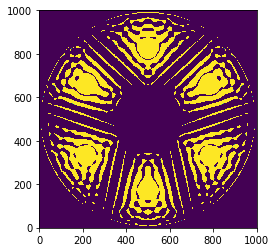

In [2]:
# First is the shapedpupil file
f825spm_fname = f825dir/'SPM_SPC-20181220_1000_rounded9_gray.fits'
f825spm = fits.open(f825spm_fname, mode='update')

f825spm_data = f825spm[0].data

f825spm[0].header['PUPLDIAM'] = 2.3631
f825spm[0].header['PUPLSCAL'] = 2.3631/1000

f825spm.close()

plt.imshow(f825spm_data)

0.001440213830594173 arcsec 0.020000000000000004


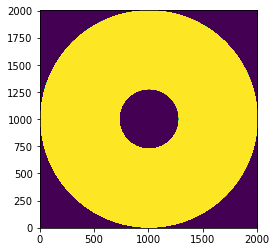

In [3]:
# Next is the FPM file for which the pixel scale must be calculated first based on lambda/D information
lamc = 825e-9*u.m
D = 2.3631*u.m
lamD825 = lamc/D
mas_per_lamD = lamc * 360.0 * 3600.0 / (2 * np.pi * D) * 1000    # mas per lambda0/D
as_per_lamD = lamc * 360.0 * 3600.0 / (2 * np.pi * D)    # as per lambda0/D
f825fpm_pxscl = (lamD825/50*u.radian).to(u.arcsecond)
print(f825fpm_pxscl, f825fpm_pxscl.value/as_per_lamD)

f825fpm_fname = f825dir/'FPM_res50_SPC-20181220.fits'
f825fpm = fits.open(f825fpm_fname, mode='update')

f825fpm_data = f825fpm[0].data
f825fpm[0].header['PIXSCALE'] = f825fpm_pxscl.value

f825fpm.close()

plt.imshow(f825fpm_data)

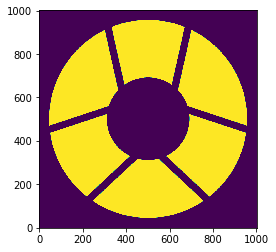

In [4]:
# Last is the lyot stop file
f825ls_fname = f825dir/'LS_SPC-20181220_1k.fits'
f825ls = fits.open(f825ls_fname, mode='update')

f825ls_data = f825ls[0].data

f825ls[0].header['PUPLDIAM'] = 2.3631
f825ls[0].header['PUPLSCAL'] = 2.3631/1000

f825ls.close()

plt.imshow(f825ls_data)

## Now the mode for the SPC 730 mode can be used. 

[webbpsf] Set the following optical configuration:
[webbpsf] camera = IMAGER, filter = F825, apodizer = DISKSPC825, fpm = DISKSPC_F825_ANNULUS, lyotstop = LS_F825
[  poppy] No source spectrum supplied, therefore defaulting to 5700 K blackbody
[  poppy] Computing wavelength weights using synthetic photometry for F825...
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: WFIRST+CGI
[  poppy] WFIRST Entrance Pupil: Loaded amplitude transmission from /home/u21/kianmilani/webbpsf-data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: WFIRST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] DISKSPC825: Loaded amplitude transmission from /home/u21/kianmilani/webbpsf-data/CGI/optics/F825/SPM_SPC-20181220_1000_rounded9_gray.fits
[  poppy] Added pupil plane: DISKSPC825
[  poppy] DISKSPC_F825_ANNULUS: Loaded amplitude transmission from /home/u21/kianmilani/webbpsf-data/CGI/optics/F825/FPM_res50_SPC-20181220.fits
[  pop

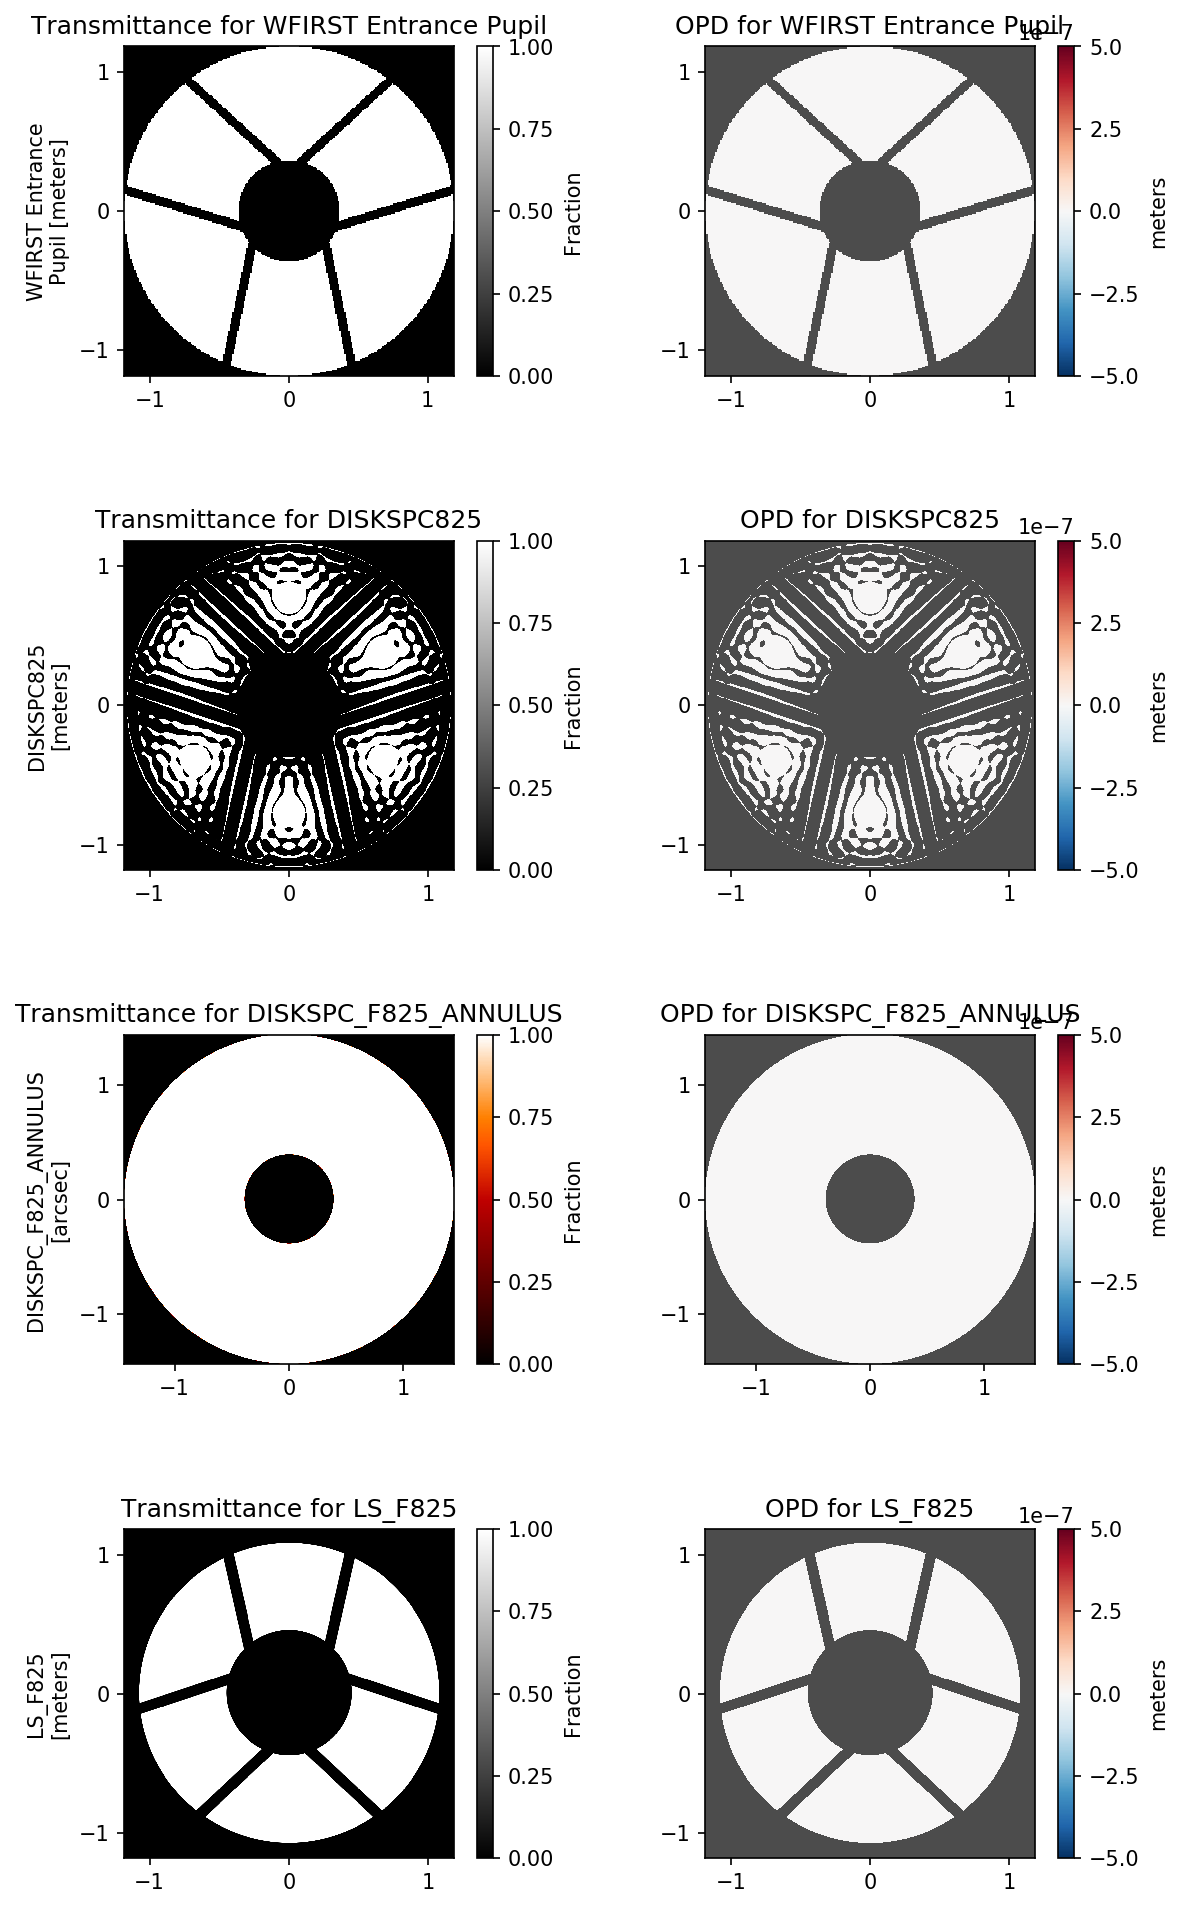

In [6]:
spc825 = wfirst.CGI(mode='DISKSPC_F825')
plt.figure(figsize=(9,16), dpi=150)
spc825.display()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=0.5)

[  poppy] No source spectrum supplied, therefore defaulting to 5700 K blackbody
[  poppy] PSF calc using fov_arcsec = 3.000000, oversample = 4, number of wavelengths = 1
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: WFIRST+CGI
[  poppy] WFIRST Entrance Pupil: Loaded amplitude transmission from /home/u21/kianmilani/webbpsf-data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: WFIRST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] DISKSPC825: Loaded amplitude transmission from /home/u21/kianmilani/webbpsf-data/CGI/optics/F825/SPM_SPC-20181220_1000_rounded9_gray.fits
[  poppy] Added pupil plane: DISKSPC825
[  poppy] DISKSPC_F825_ANNULUS: Loaded amplitude transmission from /home/u21/kianmilani/webbpsf-data/CGI/optics/F825/FPM_res50_SPC-20181220.fits
[  poppy] Added image plane: DISKSPC_F825_ANNULUS
[  poppy] LS_F825: Loaded amplitude transmission from /home/u21/kianmilani/webbpsf-data/CGI/optics/F825/LS_

[  poppy] After resampling, optic phasor shape (256, 256) is smaller than input wavefront (256, 256); will zero-pad the rescaled array.


[  poppy]   Calculation completed in 1.977 s
[  poppy] PSF Calculation completed.
[  poppy]  Adding extension with image downsampled to detector pixel scale.
[  poppy]  Downsampling to detector pixel scale, by 4


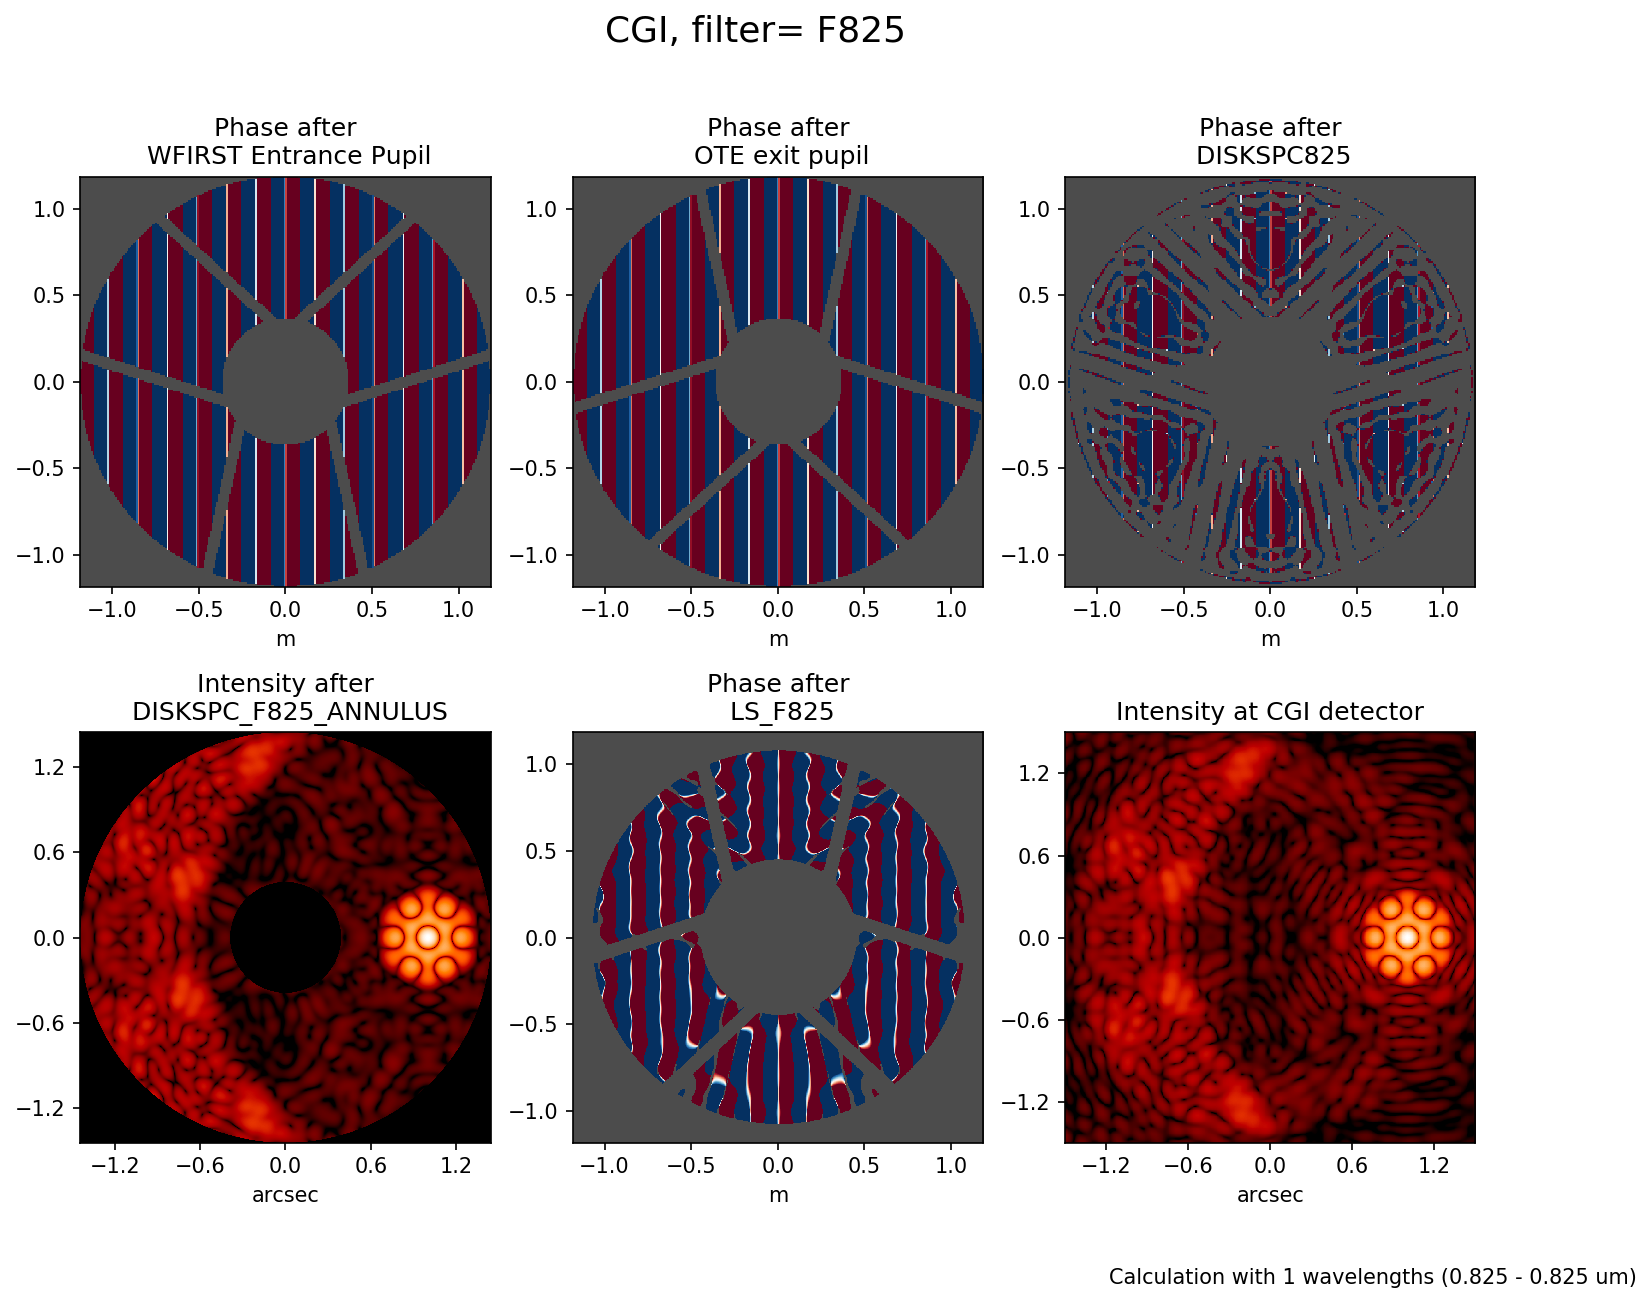

In [13]:
fov_as = 3

plt.figure(figsize=[12,9], dpi=150)
monopsf_no_offset = spc825.calc_psf(nlambda=1, fov_arcsec=fov_as, display=True)

## Calculate off-axis PSF.

[webbpsf] Set the following optical configuration:
[webbpsf] camera = IMAGER, filter = F825, apodizer = DISKSPC825, fpm = DISKSPC_F825_ANNULUS, lyotstop = LS_F825
[  poppy] No source spectrum supplied, therefore defaulting to 5700 K blackbody
[  poppy] Computing wavelength weights using synthetic photometry for F825...
[  poppy] PSF calc using fov_arcsec = 3.000000, oversample = 4, number of wavelengths = 1
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: WFIRST+CGI
[  poppy] WFIRST Entrance Pupil: Loaded amplitude transmission from /home/u21/kianmilani/webbpsf-data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: WFIRST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] DISKSPC825: Loaded amplitude transmission from /home/u21/kianmilani/webbpsf-data/CGI/optics/F825/SPM_SPC-20181220_1000_rounded9_gray.fits
[  poppy] Added pupil plane: DISKSPC825
[  poppy] DISKSPC_F825_ANNULUS: Loaded amplitude transmission

[  poppy] After resampling, optic phasor shape (256, 256) is smaller than input wavefront (256, 256); will zero-pad the rescaled array.


[  poppy]   Calculation completed in 1.863 s
[  poppy] PSF Calculation completed.
[  poppy]  Adding extension with image downsampled to detector pixel scale.
[  poppy]  Downsampling to detector pixel scale, by 4


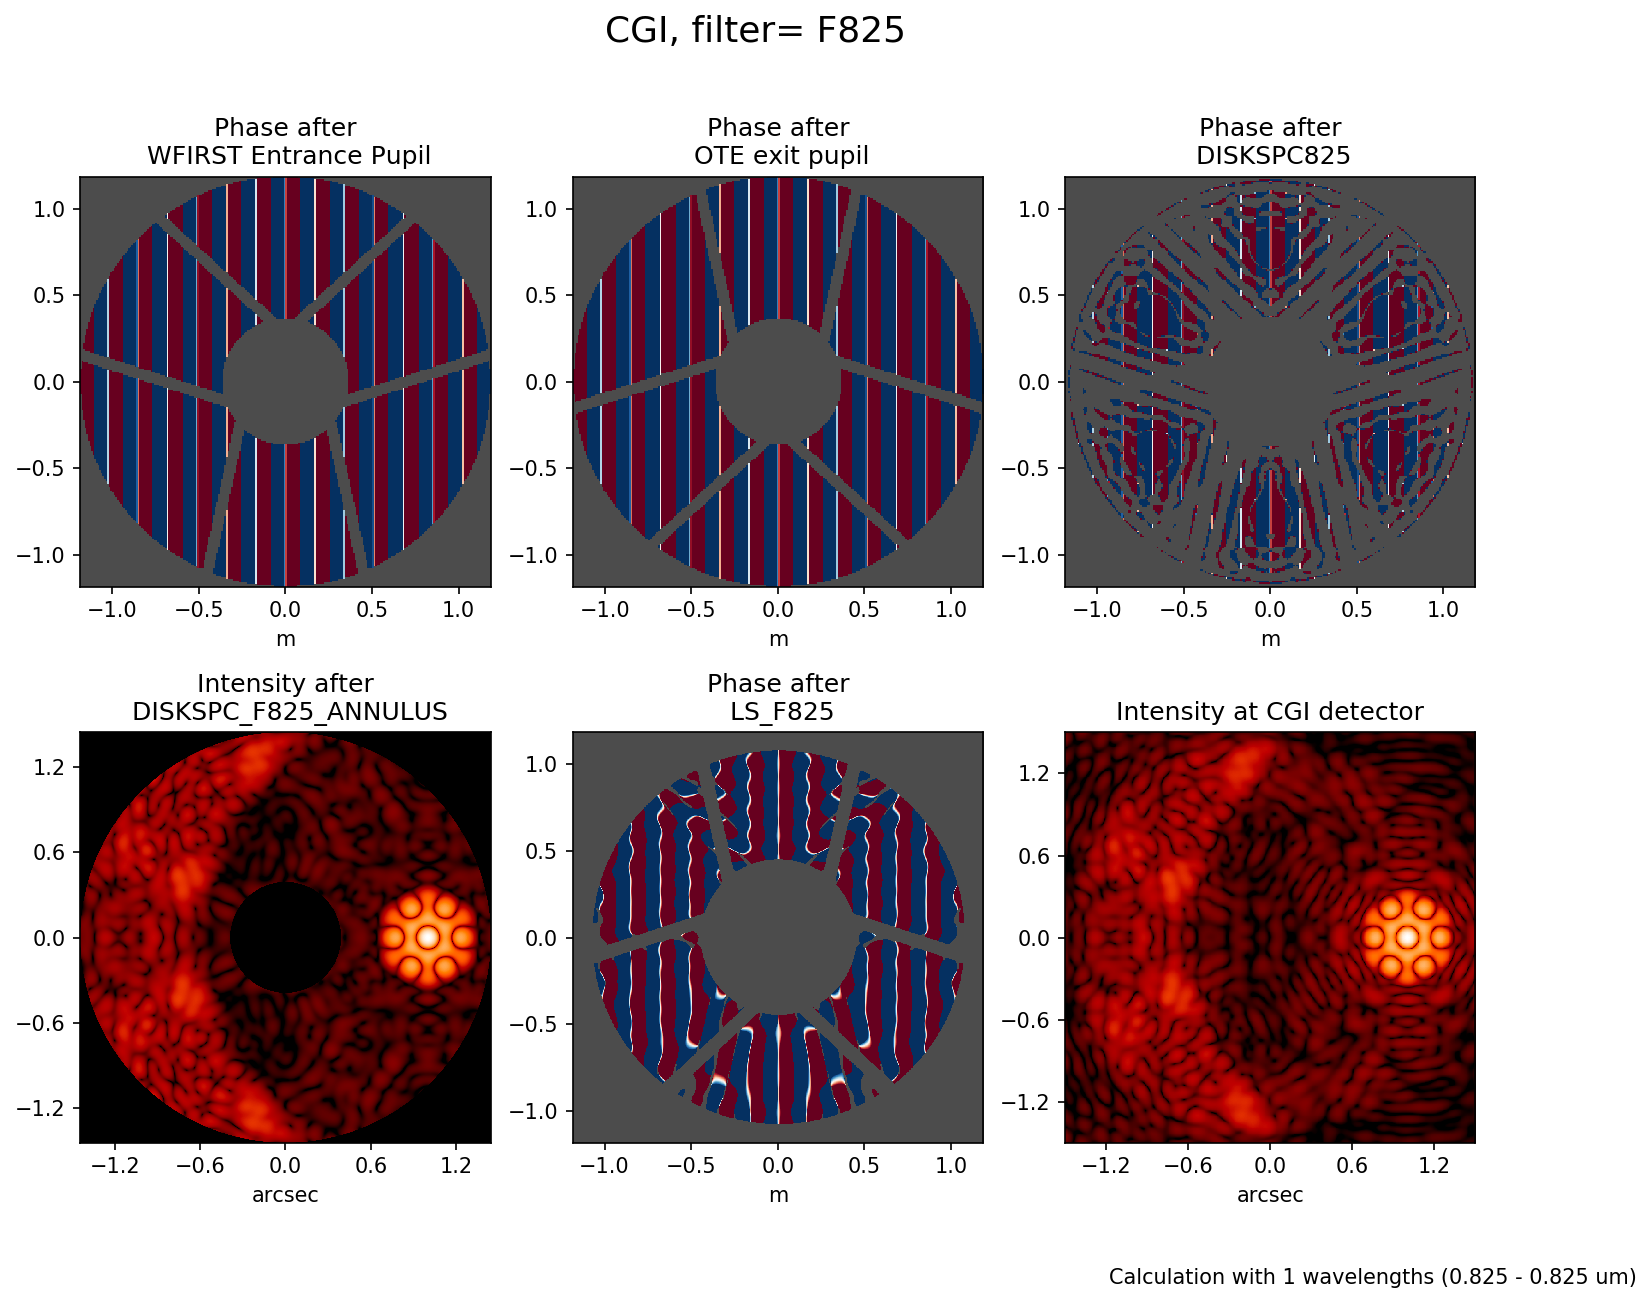

In [10]:
spc825 = wfirst.CGI(mode='DISKSPC_F825')
spc825.options['source_offset_r'] = 1 # arcsec
spc825.options['source_offset_theta'] = -90. # deg w.r.t. North

plt.figure(figsize=[12,9], dpi = 150)
monopsf_with_offset = spc825.calc_psf(nlambda=1, fov_arcsec=fov_as, display=True)

## Display both PSFs side-by-side.

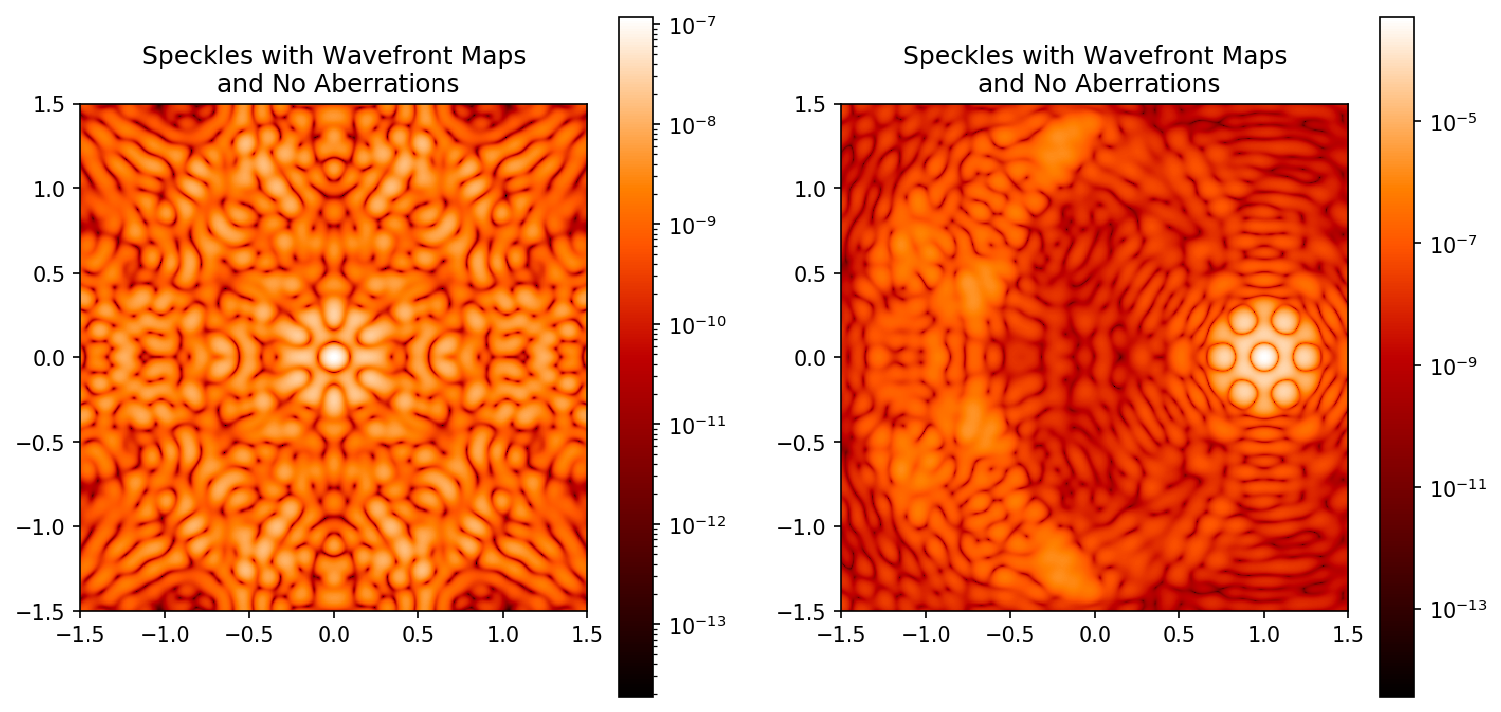

In [12]:
fig, ax  = plt.subplots( nrows=1, ncols=2, figsize=(12,6), dpi=150)

exmax = fov_as/2
extent = [-exmax,exmax,-exmax,exmax]

im = ax[0].imshow(monopsf_no_offset[0].data, norm=LogNorm(), cmap=plt.get_cmap('gist_heat'), extent=extent)
circ_in = Circle((0,0),2.6,edgecolor='cyan', facecolor='none', linewidth=2)
circ_out = Circle((0,0),9,edgecolor='cyan', facecolor='none', linewidth=2)
ax[0].add_patch(circ_in)
ax[0].add_patch(circ_out)
ax[0].set_title('Speckles with Wavefront Maps\n and No Aberrations')
fig.colorbar(im, ax=ax[0], shrink=1) 

im = ax[1].imshow(monopsf_with_offset[0].data, norm=LogNorm(), cmap=plt.get_cmap('gist_heat'), extent=extent)
circ_in = Circle((0,0),2.6,edgecolor='cyan', facecolor='none', linewidth=2)
circ_out = Circle((0,0),9,edgecolor='cyan', facecolor='none', linewidth=2)
ax[1].add_patch(circ_in)
ax[1].add_patch(circ_out)
ax[1].set_title('Speckles with Wavefront Maps\n and No Aberrations')
fig.colorbar(im, ax=ax[1], shrink=1) 